In [2]:
import os
import shutil

In [7]:
TOPDIR = 'wework_imageType'
types = ['floorplans', 'indoors', 'outdoors']
[len(os.listdir(os.path.join(TOPDIR, x))) for x in types]

[2267, 5341, 504]

In [8]:
os.mkdir(os.path.join(TOPDIR, 'train'))
os.mkdir(os.path.join(TOPDIR, 'valid'))

In [9]:
trainF = os.path.join(TOPDIR, 'train')
validF = os.path.join(TOPDIR, 'valid')
Nt = 500
Nv = 200
for t in types:
    temp = os.path.join(TOPDIR, t)
    files = os.listdir(temp)
    if t not in os.listdir(trainF):
        os.mkdir(os.path.join(trainF, t))
        os.mkdir(os.path.join(validF, t))
    toTrain = os.path.join(trainF, t)
    toValid = os.path.join(validF, t)
    for j in range(min(Nt, int(len(files) / 2))):
        shutil.move(os.path.join(temp, files[j]), os.path.join(toTrain, files[j]))
    files = os.listdir(temp)
    for m in range(min(Nv, int(len(files) / 2))):
        shutil.move(os.path.join(temp, files[m]), os.path.join(toValid, files[m]))

## Model 1

In [13]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt 
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [17]:
TRAINDIR = os.path.join(TOPDIR, 'train')
# training_datagen = ImageDataGenerator(rescale = 1/255,
#                                       rotation_range = 40,
#                                       width_shift_range = 0.2,
#                                       height_shift_range = 0.2,
#                                       shear_range = 0.2,
#                                       zoom_range = 0.2,
#                                       horizontal_flip = True, 
#                                       fill_mode = 'nearest')
training_datagen = ImageDataGenerator(rescale = 1/255)

VALIDDIR = os.path.join(TOPDIR, 'valid')
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = training_datagen.flow_from_directory(TRAINDIR,
                                                       target_size = (200, 200),
                                                       class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(VALIDDIR,
                                                              target_size = (200,200),
                                                              class_mode = 'categorical')



Found 413 images belonging to 4 classes.
Found 203 images belonging to 4 classes.


In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop',
              metrics = ['accuracy'])
history = model.fit_generator(train_generator, epochs = 20,
                              validation_data = validation_generator,
                              verbose = 1)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 21, 21, 128)      

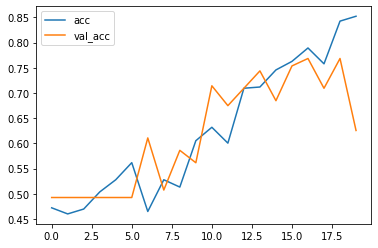

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, label = 'acc')
plt.plot(epochs, val_acc, label = 'val_acc')
plt.legend(loc=0)
plt.show()

In [40]:
from keras.preprocessing import image
labels = np.array(['floorplans', 'gym_pool_court', 'indoors', 'outdoors'])
chosen = types[3]
no = 20

print(chosen)
testFile = os.path.join(VALIDDIR, chosen)
vFiles = os.listdir(testFile)
testpic = os.path.join(testFile, vFiles[no])
img = image.load_img(testpic, target_size = (200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
images = np.vstack([x])
classes = model.predict(images, batch_size = 10)
labels[classes[0] > 0][0]


indoors


'indoors'

In [41]:
TRAINDIR = os.path.join(TOPDIR, 'train')
# training_datagen = ImageDataGenerator(rescale = 1/255,
#                                       rotation_range = 40,
#                                       width_shift_range = 0.2,
#                                       height_shift_range = 0.2,
#                                       shear_range = 0.2,
#                                       zoom_range = 0.2,
#                                       horizontal_flip = True, 
#                                       fill_mode = 'nearest')
training_datagen = ImageDataGenerator(rescale = 1/255)

VALIDDIR = os.path.join(TOPDIR, 'valid')
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = training_datagen.flow_from_directory(TRAINDIR,
                                                       target_size = (200, 200),
                                                       batch_size = 20,
                                                       class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(VALIDDIR,
                                                              target_size = (200,200),
                                                              batch_size = 20,
                                                              class_mode = 'categorical')
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop',
              metrics = ['accuracy'])
history = model.fit_generator(train_generator, steps_per_epoch=20,
                              epochs=15,
                              validation_data = validation_generator,
                              verbose = 1)



Found 413 images belonging to 4 classes.
Found 203 images belonging to 4 classes.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 23, 23, 128)       0         
______________________________________

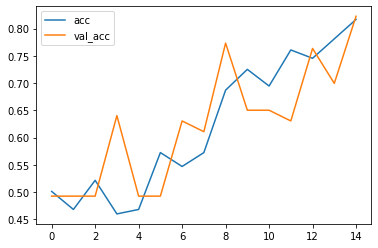

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, label = 'acc')
plt.plot(epochs, val_acc, label = 'val_acc')
plt.legend(loc=0)
plt.show()

In [56]:
from keras.preprocessing import image
labels = np.array(['floorplans', 'gym_pool_court', 'indoors', 'outdoors'])
chosen = types[1]
no = 1

print(chosen)
testFile = os.path.join(VALIDDIR, chosen)
vFiles = os.listdir(testFile)
testpic = os.path.join(testFile, vFiles[no])
img = image.load_img(testpic, target_size = (200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
images = np.vstack([x])
classes = model.predict(images, batch_size = 10)
labels[classes[0] > 0][0]

outdoors


'outdoors'

## Model 2

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt 
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [10]:
TRAINDIR = 'wework_imageType/train'
VALIDDIR = 'wework_imageType/valid'
length, width = 200, 200
training_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = training_datagen.flow_from_directory(TRAINDIR,
                                                       target_size = (length, width),
                                                       class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(VALIDDIR,
                                                              target_size = (length,width),
                                                              class_mode = 'categorical')

Found 1252 images belonging to 3 classes.
Found 526 images belonging to 3 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop',
              metrics = ['accuracy'])
history = model.fit_generator(train_generator, epochs = 20,
                              validation_data = validation_generator,
                              verbose = 1)

2022-02-10 21:37:43.342191: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       1

/Users/apple/anaconda3/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-02-10 21:37:46.432297: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
40/40 [==============================] - 143s 4s/step - loss: 1.6701 - accuracy: 0.4681 - val_loss: 0.9971 - val_accuracy: 0.3384
Epoch 2/20
40/40 [==============================] - 130s 3s/step - loss: 1.0579 - accuracy: 0.6749 - val_loss: 0.5628 - val_accuracy: 0.7433
Epoch 3/20
40/40 [==============================] - 128s 3s/step - loss: 0.5480 - accuracy: 0.7644 - val_loss: 1.1891 - val_accuracy: 0.3840
Epoch 4/20
40/40 [==============================] - 118s 3s/step - loss: 0.5309 - accuracy: 0.7700 - val_loss: 0.4498 - val_accuracy: 0.7947
Epoch 5/20
40/40 [==============================] - 117s 3s/step - loss: 0.6653 - accuracy: 0.7332 - val_loss: 0.5312 - val_accuracy: 0.7567
Epoch 6/20
40/40 [==============================] - 117s 3s/step - loss: 0.4623 - accuracy: 0.7955 - val_loss: 0.4749 - val_accuracy: 0.7567
Epoch 7/20
40/40 [==============================] - 113s 3s/step - loss: 0.4333 - accuracy: 0.8315 - val_loss: 0.5514 - val_accuracy: 0.7890
Epoch 8/20
40

In [12]:
model.save('part1.h5')

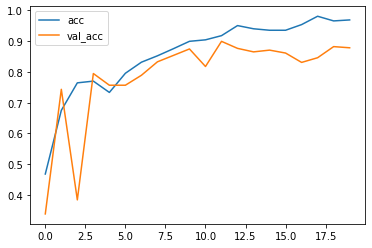

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, label = 'acc')
plt.plot(epochs, val_acc, label = 'val_acc')
plt.legend(loc=0)
plt.show()

In [30]:
def predModel(model, file, length, width, types):
    img = image.load_img(file, target_size = (length, width))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)
    return types[np.argmax(classes[0])]

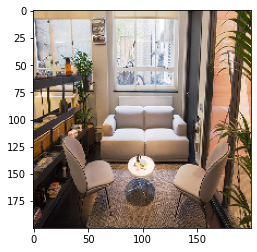

predicted as:  outdoors


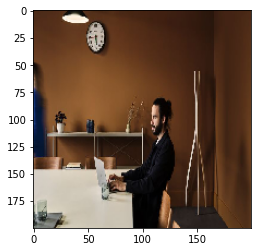

predicted as:  indoors


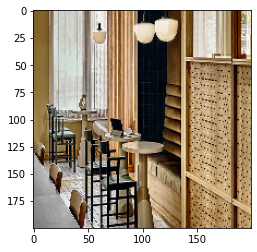

predicted as:  indoors


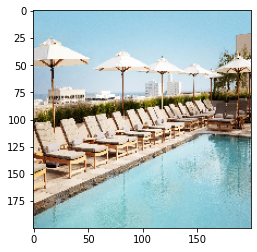

predicted as:  outdoors


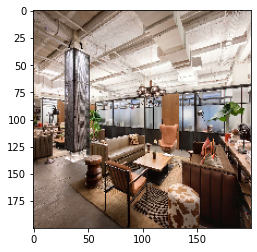

predicted as:  indoors


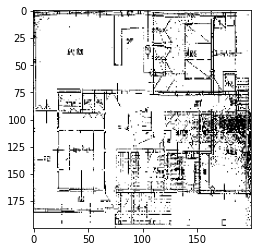

predicted as:  floorplans


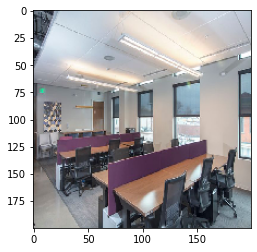

predicted as:  indoors


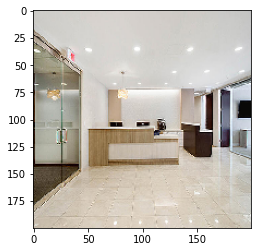

predicted as:  outdoors


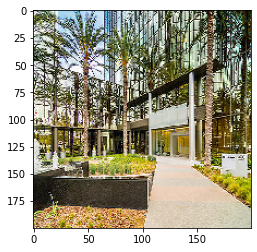

predicted as:  floorplans


In [33]:
testDir = 'testPart1'
testFiles = os.listdir(testDir)
length, width = 200, 200
types = np.array(['floorplans', 'indoors', 'outdoors'])
for f in testFiles:
    tempFile = os.path.join(testDir, f)
    tempImg = image.load_img(tempFile, target_size=(length, width))
    plt.imshow(tempImg)
    plt.show()
    print('predicted as: ', predModel(model, tempFile, length, width, types))

In [29]:
np.argmax(np.array([0,2,1,2]))

1